In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
# Read in CSV files
observations = pd.read_csv('observations.csv')
species = pd.read_csv('species_info.csv')

In [3]:
# Ensure files are readable
print(observations.head())
print(species.head())

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85
  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic 

In [4]:
# List park names, species categories and various levels of conservation status
print(observations['park_name'].unique())
# Result = 'Great Smoky Mountains National Park', 'Yosemite National Park', 'Bryce National Park', 'Yellowstone National Park'
print(species['category'].unique())
# Result = 'Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant', 'Nonvascular Plant'
print(species['conservation_status'].unique())
# Result = 'NaN', 'Species of Concern', 'Endangered', 'Threatened', 'In Recovery'

['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']
['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']
[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [5]:
# How many items per list?
print(len(observations))
print(len(species))

print('There are 23,296 items of observation as opposed to only 5,824 species listed. However, there exactly four times the number of observations are there are the number of species listed and there are four different parks where observations are made.')

23296
5824
There are 23,296 items of observation as opposed to only 5,824 species listed. However, there exactly four times the number of observations are there are the number of species listed and there are four different parks where observations are made.


In [6]:
pivoted = pd.pivot_table(observations, values='observations', index=['scientific_name'], columns='park_name').reset_index()

display(pivoted.head())

park_name,scientific_name,Bryce National Park,Great Smoky Mountains National Park,Yellowstone National Park,Yosemite National Park
0,Abies bifolia,109.0,72.0,215.0,136.0
1,Abies concolor,83.0,101.0,241.0,205.0
2,Abies fraseri,109.0,81.0,218.0,110.0
3,Abietinella abietina,101.0,65.0,243.0,183.0
4,Abronia ammophila,92.0,72.0,222.0,137.0


In [7]:
# Combine dataframes
species = species.fillna('')
combined = pivoted.merge(species, on = 'scientific_name', how = 'inner')
print(len(combined))
display(combined.head())

5824


,scientific_name,Bryce National Park,Great Smoky Mountains National Park,Yellowstone National Park,Yosemite National Park,category,common_names,conservation_status
0,Abies bifolia,109.0,72.0,215.0,136.0,Vascular Plant,Rocky Mountain Alpine Fir,
1,Abies concolor,83.0,101.0,241.0,205.0,Vascular Plant,"Balsam Fir, Colorado Fir, Concolor Fir, Silver...",
2,Abies fraseri,109.0,81.0,218.0,110.0,Vascular Plant,Fraser Fir,Species of Concern
3,Abietinella abietina,101.0,65.0,243.0,183.0,Nonvascular Plant,Abietinella Moss,
4,Abronia ammophila,92.0,72.0,222.0,137.0,Vascular Plant,"Wyoming Sand Verbena, Yellowstone Sand Verbena",Species of Concern


In [8]:
# How many species are listed under each type of conservation status?
conservation_number = combined.groupby('conservation_status').scientific_name.count().reset_index()
conservation_number = conservation_number.rename(columns={'conservation_status': 'Conservation Status'})
conservation_number = conservation_number.rename(columns={'scientific_name': 'Number of Species'})


print(conservation_number)
print('There are 161 species of concern, 10 threatened species, 16 endangered species and 4 species listed as being in recovery.')

  Conservation Status  Number of Species
0                                   5633
1          Endangered                 16
2         In Recovery                  4
3  Species of Concern                161
4          Threatened                 10
There are 161 species of concern, 10 threatened species, 16 endangered species and 4 species listed as being in recovery.


In [9]:
# Given there seem to be extra entries for the gray wolf, how many entries are there total?

wolf_observations = observations[(observations.scientific_name == 'Canis lupus')]
wolf_species = species[(species.scientific_name == 'Canis lupus')]
canis_lupus = pivoted[(pivoted.scientific_name == 'Canis lupus')]
print(wolf_observations)
print(len(wolf_observations))
print(wolf_species)
print(len(wolf_species))
#print(canis_lupus)
#print(len(canis_lupus))
print('The number of items has increased. On reviewing the observations table, it is evident that some species are observed multiple times within the same park. For example, canis lupus is observed a total of 36 times across all four parks. Review of canis lupus shows the data is duplicated three times, with each entry listing \'Gray Wolf - endangered\', \'Gray Wolf, Wolf - In Recovery\' and \'Gray Wolf, Wolf - Endangered\'.')

      scientific_name                            park_name  observations
1294      Canis lupus               Yosemite National Park            35
1766      Canis lupus                  Bryce National Park            27
7346      Canis lupus                  Bryce National Park            29
9884      Canis lupus                  Bryce National Park            74
10190     Canis lupus  Great Smoky Mountains National Park            15
10268     Canis lupus            Yellowstone National Park            60
10907     Canis lupus            Yellowstone National Park            67
13427     Canis lupus            Yellowstone National Park           203
17756     Canis lupus  Great Smoky Mountains National Park            14
19330     Canis lupus               Yosemite National Park           117
19987     Canis lupus               Yosemite National Park            44
20353     Canis lupus  Great Smoky Mountains National Park            30
12
     category scientific_name     common_names c

In [10]:
# How many species are observed multiple times within the same park?
extra_observations = observations.scientific_name.value_counts().loc[lambda x: x > 11].reset_index()['index']
extra_species = species.scientific_name.value_counts().loc[lambda x: x > 2].reset_index()['index']
print(extra_observations)
print('These are the species that show up twelve times within the observations list.')
print(extra_species)
print('These are the species that show up three times within the species list. Both lists have multiple entries for the same set of species.')

0         Myotis lucifugus
1            Puma concolor
2     Hypochaeris radicata
3           Holcus lanatus
4    Streptopelia decaocto
5        Castor canadensis
6            Procyon lotor
7            Columba livia
8              Canis lupus
Name: index, dtype: object
These are the species that show up twelve times within the observations list.
0        Castor canadensis
1              Canis lupus
2     Hypochaeris radicata
3            Columba livia
4            Puma concolor
5    Streptopelia decaocto
6           Holcus lanatus
7         Myotis lucifugus
8            Procyon lotor
Name: index, dtype: object
These are the species that show up three times within the species list. Both lists have multiple entries for the same set of species.


In [11]:
# What is the range of observations?

yosemite_min_obs = combined['Yosemite National Park'].min()
print(yosemite_min_obs)
yosemite_max_obs = combined['Yosemite National Park'].max()
print(yosemite_max_obs)
print('For any given species within Yosemite National Park, the lowest number of observations is 31 and the highest number of observations is 223.')

yosemite_fewest = combined[(combined['Yosemite National Park']) == 31]
yosemite_most = combined[(combined['Yosemite National Park']) == 223]

print(yosemite_fewest)
print(yosemite_most)

print('In Yosemite, the fewest observations recorded were of the fish, noturus baileyi (\'Smoky Madtom\'), and the most observations were of the vascular plant ivesia shockleyi.')

31.0
223.0
For any given species within Yosemite National Park, the lowest number of observations is 31 and the highest number of observations is 223.
      scientific_name  Bryce National Park  \
3562  Noturus baileyi                 22.0   

      Great Smoky Mountains National Park  Yellowstone National Park  \
3562                                 23.0                       67.0   

      Yosemite National Park category  common_names conservation_status  
3562                    31.0     Fish  Smoky Madtom          Endangered  
                      scientific_name  Bryce National Park  \
2738  Ivesia shockleyi var. shockleyi                 84.0   

      Great Smoky Mountains National Park  Yellowstone National Park  \
2738                                 44.0                      262.0   

      Yosemite National Park        category  \
2738                   223.0  Vascular Plant   

                          common_names conservation_status  
2738  Shockley's Ivesia, Sky Mouset

In [12]:
bryce_min_obs = combined['Bryce National Park'].min()
print(bryce_min_obs)
bryce_max_obs = combined['Bryce National Park'].max()
print(bryce_max_obs)
print('For any given species within Bryce National Park, the lowest number of observations is 9 and the highest number of observations is 176.')

bryce_fewest = combined[(combined['Bryce National Park']) == 9]
bryce_most = combined[(combined['Bryce National Park']) == 176]

print(bryce_fewest)
print(bryce_most)

print('In Bryce National Park, the fewest observations recorded were of the vascular plant, corydalis aurea (\'Golden Corydalis, Scrambled Eggs\'), and the most observations were of the vascular plant valerianella radiata (\'Beaked Corn-Salad, Corn Salad\').')

9.0
176.0
For any given species within Bryce National Park, the lowest number of observations is 9 and the highest number of observations is 176.
      scientific_name  Bryce National Park  \
1478  Corydalis aurea                  9.0   

      Great Smoky Mountains National Park  Yellowstone National Park  \
1478                                 92.0                      253.0   

      Yosemite National Park        category  \
1478                   141.0  Vascular Plant   

                          common_names conservation_status  
1478  Golden Corydalis, Scrambled Eggs                      
           scientific_name  Bryce National Park  \
5610  Valerianella radiata                176.0   

      Great Smoky Mountains National Park  Yellowstone National Park  \
5610                                 25.0                      267.0   

      Yosemite National Park        category                   common_names  \
5610                   156.0  Vascular Plant  Beaked Corn-Salad, Corn 

In [13]:
smoky_min_obs = combined['Great Smoky Mountains National Park'].min()
print(smoky_min_obs)
smoky_max_obs = combined['Great Smoky Mountains National Park'].max()
print(smoky_max_obs)
print('For any given species within Great Smoky Mountains National Park, the lowest number of observations is 10 and the highest number of observations is 147.')

smoky_fewest = combined[(combined['Great Smoky Mountains National Park']) == 10]
smoky_most = combined[(combined['Great Smoky Mountains National Park']) == 147]

print(smoky_fewest)
print(smoky_most)

print('In Great Smoky Mountains National Park, the fewest observations recorded were of the vascular plant, collomia tinctoria (\'Staining Collomia, Yellowstain Collomia\'), and the most observations were of the vascular plant sonchus asper (\'Spiny Sowthistle\').')

10.0
147.0
For any given species within Great Smoky Mountains National Park, the lowest number of observations is 10 and the highest number of observations is 147.
         scientific_name  Bryce National Park  \
1411  Collomia tinctoria                 81.0   

      Great Smoky Mountains National Park  Yellowstone National Park  \
1411                                 10.0                      242.0   

      Yosemite National Park        category  \
1411                   208.0  Vascular Plant   

                                 common_names conservation_status  
1411  Staining Collomia, Yellowstain Collomia                      
               scientific_name  Bryce National Park  \
5089  Sonchus asper ssp. asper                124.0   

      Great Smoky Mountains National Park  Yellowstone National Park  \
5089                                147.0                      215.0   

      Yosemite National Park        category      common_names  \
5089                   117.0  Vascula

In [14]:
yellowstone_min_obs = combined['Yellowstone National Park'].min()
print(yellowstone_min_obs)
yellowstone_max_obs = combined['Yellowstone National Park'].max()
print(yellowstone_max_obs)
print('For any given species within Yellowstone National Park, the lowest number of observations is 10 and the highest number of observations is 147.')

yellowstone_fewest = combined[(combined['Yellowstone National Park']) == 57]
yellowstone_most = combined[(combined['Yellowstone National Park']) == 321]

print(yellowstone_fewest)
print(yellowstone_most)

print('In Yellowstone National Park, the fewest observations recorded were of the bird, grus americana (\'Whooping Crane\'), and the most observations were of the vascular plant lycopodium tristachyum (\'Deep-Root Clubmoss, Ground Cedar\').')

57.0
321.0
For any given species within Yellowstone National Park, the lowest number of observations is 10 and the highest number of observations is 147.
     scientific_name  Bryce National Park  \
2433  Grus americana                 24.0   

      Great Smoky Mountains National Park  Yellowstone National Park  \
2433                                 13.0                       57.0   

      Yosemite National Park category    common_names conservation_status  
2433                    37.0     Bird  Whooping Crane          Endangered  
             scientific_name  Bryce National Park  \
3180  Lycopodium tristachyum                122.0   

      Great Smoky Mountains National Park  Yellowstone National Park  \
3180                                 90.0                      321.0   

      Yosemite National Park        category  \
3180                   196.0  Vascular Plant   

                          common_names conservation_status  
3180  Deep-Root Clubmoss, Ground Cedar          

park_name
Bryce National Park                     576025
Great Smoky Mountains National Park     431820
Yellowstone National Park              1443562
Yosemite National Park                  863332
Name: observations, dtype: int64


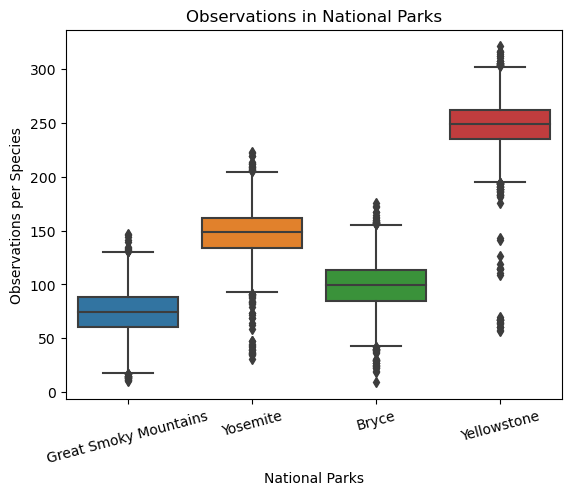

Yellowstone National Park has the greatest number of observations with a total of 1,443,562. Second is Yosemite National Park with a total of 863,332 observations. Third is Bryce National Park with 576,025 observations. Finally, Great Smoky Mountains National Park has a total of 431,820 observations.


<Figure size 640x480 with 0 Axes>

In [15]:
# What are the number of observations per park?

park_observations = observations.groupby('park_name')['observations'].sum()
print(park_observations)

# Break the data down into individual dataframes per park
#yellowstone = observations[(observations['park_name']) == 'Yellowstone National Park']
#smoky_mountains = observations[(observations['park_name']) == 'Great Smoky Mountains National Park']
#bryce = observations[(observations['park_name']) == 'Bryce National Park']
#yosemite = observations[(observations['park_name']) == 'Yosemite National Park']

# Total the number of observations per park
#yellowstone_observations = yellowstone.observations
#smoky_mountains_observations = smoky_mountains.observations
#bryce_observations = bryce.observations
#yosemite_observations = yosemite.observations

# Combine the park observations into a list that can be graphed
#all_park_observations = [yellowstone_observations, smoky_mountains_observations, bryce_observations, yosemite_observations]

ax = sns.boxplot(x = 'park_name', y = 'observations', data = observations)
plt.ylabel('Observations per Species')
plt.xlabel('National Parks')
plt.xticks(rotation=15)
plt.title('Observations in National Parks')
ax.set_xticklabels(['Great Smoky Mountains', 'Yosemite', 'Bryce', 'Yellowstone'])
plt.show()
plt.clf()

print('Yellowstone National Park has the greatest number of observations with a total of 1,443,562. Second is Yosemite National Park with a total of 863,332 observations. Third is Bryce National Park with 576,025 observations. Finally, Great Smoky Mountains National Park has a total of 431,820 observations.')

In [16]:
endangered = species.loc[species['conservation_status'] == 'Endangered']
threatened = species.loc[species['conservation_status'] == 'Threatened']
species_of_concern = species.loc[species['conservation_status'] == 'Species of Concern']
in_recovery = species.loc[species['conservation_status'] == 'In Recovery']

In [17]:
endangered_count = len(endangered)
print(endangered_count)
display(endangered)
print('Most endangered species are mammals with a few fish and birds.')

16


,category,scientific_name,common_names,conservation_status
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered
34,Mammal,Myotis grisescens,Gray Myotis,Endangered
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered
72,Mammal,Glaucomys sabrinus coloratus,"Carolina Northern Flying Squirrel, Northern Fl...",Endangered
173,Bird,Grus americana,Whooping Crane,Endangered
276,Bird,Vermivora bachmanii,"Bachman's Warbler, Bachman's Wood Warbler",Endangered
343,Bird,Picoides borealis,Red-Cockaded Woodpecker,Endangered
540,Fish,Etheostoma percnurum,Duskytail Darter,Endangered
570,Fish,Noturus baileyi,Smoky Madtom,Endangered


Most endangered species are mammals with a few fish and birds.


In [18]:
threatened_count = len(threatened)
print(threatened_count)
display(threatened)
print('Threatened species appear to be evenly distributed across several categories.')

10


,category,scientific_name,common_names,conservation_status
38,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",Threatened
490,Fish,Erimonax monachus,Spotfin Chub,Threatened
571,Fish,Noturus flavipinnis,Yellowfin Madtom,Threatened
704,Vascular Plant,Isotria medeoloides,Small Whorled Pogonia,Threatened
2562,Vascular Plant,Spiraea virginiana,Virginia Spiraea,Threatened
3032,Mammal,Ursus arctos horribilis,Grizzly Bear,Threatened
3283,Fish,Oncorhynchus mykiss,Rainbow Trout,Threatened
4597,Amphibian,Anaxyrus canorus,Yosemite Toad,Threatened
4600,Amphibian,Rana draytonii,California Red-Legged Frog,Threatened
4612,Fish,Oncorhynchus clarkii henshawi,Lahontan Cutthroat Trout,Threatened


Threatened species appear to be evenly distributed across several categories.


In [19]:
concern_count = len(species_of_concern)
print(concern_count)
display(species_of_concern)
print(species_of_concern['category'].value_counts())
print('Most species listed as \'Species of Concern\' are birds with 72 species, followed by vascular plants with 43 species and mammals with 28 species.')

161


,category,scientific_name,common_names,conservation_status
7,Mammal,Canis latrans,Coyote,Species of Concern
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern
33,Mammal,Myotis austroriparius,"Mississippi Myotis, Southeastern Myotis",Species of Concern
35,Mammal,Myotis keenii,Keen's Myotis,Species of Concern
...,...,...,...,...
5302,Vascular Plant,Callitriche marginata,Winged Water-Starwort,Species of Concern
5399,Vascular Plant,Camissonia sierrae ssp. alticola,"Mono Hot Springs Evening Primrose, Mono Hot Sp...",Species of Concern
5426,Vascular Plant,Epilobium oreganum,"Grants Pass Willowherb, Oregon Fireweed",Species of Concern
5436,Vascular Plant,Botrychium ascendens,"Trianglelobe Moonwort, Upswept Moonwort",Species of Concern


Bird                 72
Vascular Plant       43
Mammal               28
Reptile               5
Nonvascular Plant     5
Amphibian             4
Fish                  4
Name: category, dtype: int64
Most species listed as 'Species of Concern' are birds with 72 species, followed by vascular plants with 43 species and mammals with 28 species.


In [20]:
recovery_count = len(in_recovery)
print(recovery_count)

display(in_recovery)

4


,category,scientific_name,common_names,conservation_status
100,Bird,Haliaeetus leucocephalus,Bald Eagle,In Recovery
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery
3143,Bird,Falco peregrinus anatum,American Peregrine Falcon,In Recovery
4565,Bird,Pelecanus occidentalis,Brown Pelican,In Recovery


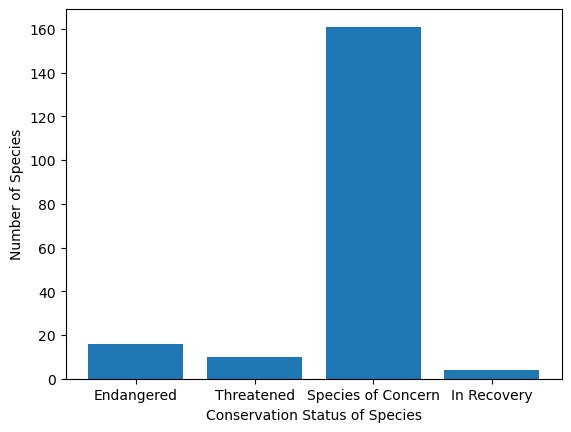

<Figure size 640x480 with 0 Axes>

In [21]:
total_conservation = [endangered_count, threatened_count, concern_count, recovery_count]

plt.bar(range(len(total_conservation)), total_conservation)
ax = plt.subplot()
plt.ylabel('Number of Species')
plt.xlabel('Conservation Status of Species')
ax.set_xticks(range(4))
ax.set_xticklabels(['Endangered', 'Threatened', 'Species of Concern', 'In Recovery'])
plt.show()
plt.clf()

In [22]:
# Set NaN to blank spaces
not_nan = combined[(combined.conservation_status != '')]
not_nan['Bryce National Park'] = not_nan['Bryce National Park'].astype(int)
not_nan['Great Smoky Mountains National Park'] = not_nan['Great Smoky Mountains National Park'].astype(int)
not_nan['Yellowstone National Park'] = not_nan['Yellowstone National Park'].astype(int)
not_nan['Yosemite National Park'] = not_nan['Yosemite National Park'].astype(int)
display(not_nan)

/var/folders/kh/v46x_dw12ks5x0fm3_c7zdhr0000gp/T/ipykernel_81877/2877961123.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_nan['Bryce National Park'] = not_nan['Bryce National Park'].astype(int)
/var/folders/kh/v46x_dw12ks5x0fm3_c7zdhr0000gp/T/ipykernel_81877/2877961123.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_nan['Great Smoky Mountains National Park'] = not_nan['Great Smoky Mountains National Park'].astype(int)
/var/folders/kh/v46x_dw12ks5x0fm3_c7zdhr0000gp/T/ipykernel_81877/2877961

,scientific_name,Bryce National Park,Great Smoky Mountains National Park,Yellowstone National Park,Yosemite National Park,category,common_names,conservation_status
2,Abies fraseri,109,81,218,110,Vascular Plant,Fraser Fir,Species of Concern
4,Abronia ammophila,92,72,222,137,Vascular Plant,"Wyoming Sand Verbena, Yellowstone Sand Verbena",Species of Concern
11,Accipiter cooperii,95,65,245,138,Bird,Cooper's Hawk,Species of Concern
13,Accipiter striatus,62,69,200,115,Bird,Sharp-Shinned Hawk,Species of Concern
31,Achnatherum contractum,122,43,219,165,Vascular Plant,Contracted Ricegrass,Species of Concern
...,...,...,...,...,...,...,...,...
5595,Vaccinium hirsutum,90,58,213,125,Vascular Plant,Hairy Blueberry,Species of Concern
5628,Vermivora bachmanii,20,18,58,45,Bird,"Bachman's Warbler, Bachman's Wood Warbler",Endangered
5637,Vermivora ruficapilla,67,59,229,108,Bird,Nashville Warbler,Species of Concern
5776,Wilsonia pusilla,108,68,205,118,Bird,Wilson's Warbler,Species of Concern


In [23]:
combined_endangered = not_nan.loc[not_nan['conservation_status'] == 'Endangered']
combined_threatened = not_nan.loc[not_nan['conservation_status'] == 'Threatened']
combined_concern = not_nan.loc[not_nan['conservation_status'] == 'Species of Concern']
combined_recovery = not_nan.loc[not_nan['conservation_status'] == 'In Recovery']
combined_endangered = combined_endangered.rename(columns={'scientific_name': 'Scientific Name', 'category': 'Category', 'common_names': 'Common Names', 'conservation_status': 'Conservation Status'})
#combined = combined.rename(columns={'common_names': 'Common Names'})
display(combined_endangered)

,Scientific Name,Bryce National Park,Great Smoky Mountains National Park,Yellowstone National Park,Yosemite National Park,Category,Common Names,Conservation Status
838,Canis lupus,43,19,110,65,Mammal,Gray Wolf,Endangered
840,Canis lupus,43,19,110,65,Mammal,"Gray Wolf, Wolf",Endangered
841,Canis rufus,30,13,60,34,Mammal,Red Wolf,Endangered
1256,Chasmistes liorus,23,23,65,35,Fish,June Sucker,Endangered
2128,Etheostoma percnurum,25,31,70,40,Fish,Duskytail Darter,Endangered
2379,Geum radiatum,25,27,63,47,Vascular Plant,"Mountain Avens, Spreading Avens",Endangered
2399,Glaucomys sabrinus coloratus,29,21,67,36,Mammal,"Carolina Northern Flying Squirrel, Northern Fl...",Endangered
2433,Grus americana,24,13,57,37,Bird,Whooping Crane,Endangered
2438,Gymnogyps californianus,30,15,64,47,Bird,California Condor,Endangered
3484,Myotis grisescens,27,26,68,39,Mammal,Gray Myotis,Endangered


In [24]:
combined_threatened = combined_threatened.rename(columns={'scientific_name': 'Scientific Name', 'category': 'Category', 'common_names': 'Common Names', 'conservation_status': 'Conservation Status'})
#combined = combined.rename(columns={'common_names': 'Common Names'})
display(combined_threatened)

,Scientific Name,Bryce National Park,Great Smoky Mountains National Park,Yellowstone National Park,Yosemite National Park,Category,Common Names,Conservation Status
250,Anaxyrus canorus,43,30,114,87,Amphibian,Yosemite Toad,Threatened
2057,Erimonax monachus,46,18,109,69,Fish,Spotfin Chub,Threatened
2727,Isotria medeoloides,42,36,114,82,Vascular Plant,Small Whorled Pogonia,Threatened
3490,Myotis septentrionalis,52,34,143,73,Mammal,"Northern Long-Eared Bat, Northern Myotis",Threatened
3563,Noturus flavipinnis,55,36,126,72,Fish,Yellowfin Madtom,Threatened
3599,Oncorhynchus clarkii henshawi,57,48,111,85,Fish,Lahontan Cutthroat Trout,Threatened
3602,Oncorhynchus mykiss,82,50,186,88,Fish,Rainbow Trout,Threatened
4460,Rana draytonii,37,43,141,69,Amphibian,California Red-Legged Frog,Threatened
5167,Spiraea virginiana,57,45,114,62,Vascular Plant,Virginia Spiraea,Threatened
5573,Ursus arctos horribilis,38,50,115,73,Mammal,Grizzly Bear,Threatened


In [25]:
combined_concern = combined_concern.rename(columns={'scientific_name': 'Scientific Name', 'category': 'Category', 'common_names': 'Common Names', 'conservation_status': 'Conservation Status'})
#combined = combined.rename(columns={'common_names': 'Common Names'})
display(combined_concern)

,Scientific Name,Bryce National Park,Great Smoky Mountains National Park,Yellowstone National Park,Yosemite National Park,Category,Common Names,Conservation Status
2,Abies fraseri,109,81,218,110,Vascular Plant,Fraser Fir,Species of Concern
4,Abronia ammophila,92,72,222,137,Vascular Plant,"Wyoming Sand Verbena, Yellowstone Sand Verbena",Species of Concern
11,Accipiter cooperii,95,65,245,138,Bird,Cooper's Hawk,Species of Concern
13,Accipiter striatus,62,69,200,115,Bird,Sharp-Shinned Hawk,Species of Concern
31,Achnatherum contractum,122,43,219,165,Vascular Plant,Contracted Ricegrass,Species of Concern
...,...,...,...,...,...,...,...,...
5507,Trillium pusillum var. pusillum,105,84,228,150,Vascular Plant,Dwarf Wakerobin,Species of Concern
5595,Vaccinium hirsutum,90,58,213,125,Vascular Plant,Hairy Blueberry,Species of Concern
5637,Vermivora ruficapilla,67,59,229,108,Bird,Nashville Warbler,Species of Concern
5776,Wilsonia pusilla,108,68,205,118,Bird,Wilson's Warbler,Species of Concern


In [26]:
combined_recovery = combined_recovery.rename(columns={'scientific_name': 'Scientific Name', 'category': 'Category', 'common_names': 'Common Names', 'conservation_status': 'Conservation Status'})
display(combined_recovery)

,Scientific Name,Bryce National Park,Great Smoky Mountains National Park,Yellowstone National Park,Yosemite National Park,Category,Common Names,Conservation Status
839,Canis lupus,43,19,110,65,Mammal,"Gray Wolf, Wolf",In Recovery
2211,Falco peregrinus anatum,72,70,176,152,Bird,American Peregrine Falcon,In Recovery
2456,Haliaeetus leucocephalus,94,72,187,112,Bird,Bald Eagle,In Recovery
3778,Pelecanus occidentalis,92,47,196,122,Bird,Brown Pelican,In Recovery


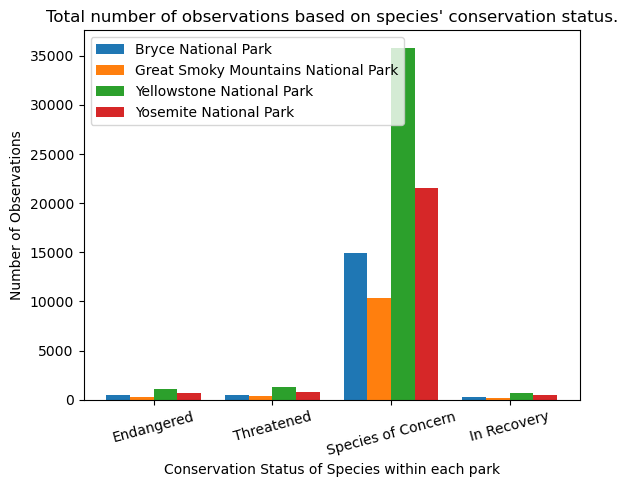

<Figure size 640x480 with 0 Axes>

In [27]:
# Make a list of park names
park_names = ['Bryce National Park', 'Great Smoky Mountains National Park', 'Yellowstone National Park', 'Yosemite National Park']

bryce_endangered_total = combined_endangered['Bryce National Park'].sum()
bryce_threatened_total = combined_threatened['Bryce National Park'].sum()
bryce_concern_total = combined_concern['Bryce National Park'].sum()
bryce_recovery_total = combined_recovery['Bryce National Park'].sum()

all_bryce = [bryce_endangered_total, bryce_threatened_total, bryce_concern_total, bryce_recovery_total]

smoky_endangered_total = combined_endangered['Great Smoky Mountains National Park'].sum()
smoky_threatened_total = combined_threatened['Great Smoky Mountains National Park'].sum()
smoky_concern_total = combined_concern['Great Smoky Mountains National Park'].sum()
smoky_recovery_total = combined_recovery['Great Smoky Mountains National Park'].sum()

all_smoky = [smoky_endangered_total, smoky_threatened_total, smoky_concern_total, smoky_recovery_total]

yellowstone_endangered_total = combined_endangered['Yellowstone National Park'].sum()
yellowstone_threatened_total = combined_threatened['Yellowstone National Park'].sum()
yellowstone_concern_total = combined_concern['Yellowstone National Park'].sum()
yellowstone_recovery_total = combined_recovery['Yellowstone National Park'].sum()

all_yellowstone = [yellowstone_endangered_total, yellowstone_threatened_total, yellowstone_concern_total, yellowstone_recovery_total]

yosemite_endangered_total = combined_endangered['Yosemite National Park'].sum()
yosemite_threatened_total = combined_threatened['Yosemite National Park'].sum()
yosemite_concern_total = combined_concern['Yosemite National Park'].sum()
yosemite_recovery_total = combined_recovery['Yosemite National Park'].sum()

all_yosemite = [yosemite_endangered_total, yosemite_threatened_total, yosemite_concern_total, yosemite_recovery_total]

#print(bryce_endangered_total)
#print(gsm_endangered_total)
#print(yellowstone_endangered_total)
#print(yosemite_endangered_total)

conservation_list = ['Endangered', 'Threatened', 'Species of Concern', 'In Recovery']

# Bryce values
n = 1
t = 4
d = 4
w = 0.8
park1_x = [t*element + w*n for element in range(d)]

plt.bar(park1_x, all_bryce)

# Great Smoky Mountains values
n = 2
t = 4
d = 4
w = 0.8
park2_x = [t*element + w*n for element in range(d)]

plt.bar(park2_x, all_smoky)

# Yellowstone values
n = 3
t = 4
d = 4
w = 0.8
park3_x = [t*element + w*n for element in range(d)]

plt.bar(park3_x, all_yellowstone)

# Yosemite values
n = 4
t = 4
d = 4
w = 0.8
park4_x = [t*element + w*n for element in range(d)]

plt.bar(park4_x, all_yosemite)

ax = plt.subplot()
plt.xticks(np.arange(2, 16, 4))
ax.set_xticklabels(['Endangered', 'Threatened', 'Species of Concern', 'In Recovery'], rotation = 15)
plt.legend(['Bryce National Park', 'Great Smoky Mountains National Park', 'Yellowstone National Park', 'Yosemite National Park'], loc=2)
plt.xlabel('Conservation Status of Species within each park')
plt.ylabel('Number of Observations')
plt.title('Total number of observations based on species\' conservation status.')
plt.show()
plt.clf()

#all_endangered_total = [bryce_endangered_total, gsm_endangered_total, yellowstone_endangered_total, yosemite_endangered_total]

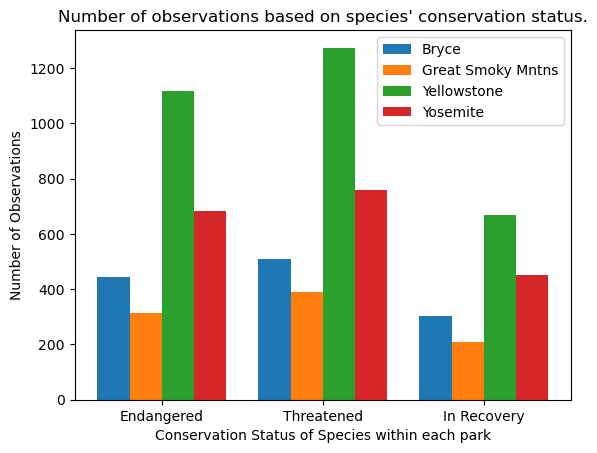

<Figure size 640x480 with 0 Axes>

In [28]:
all_bryce_minus_concern = [bryce_endangered_total, bryce_threatened_total, bryce_recovery_total]
all_smoky_minus_concern = [smoky_endangered_total, smoky_threatened_total, smoky_recovery_total]
all_yellowstone_minus_concern = [yellowstone_endangered_total, yellowstone_threatened_total, yellowstone_recovery_total]
all_yosemite_minus_concern = [yosemite_endangered_total, yosemite_threatened_total, yosemite_recovery_total]

# Bryce values
n = 1
t = 4
d = 3
w = 0.8
park1_x = [t*element + w*n for element in range(d)]

plt.bar(park1_x, all_bryce_minus_concern)

# Great Smoky Mountains values
n = 2
t = 4
d = 3
w = 0.8
park2_x = [t*element + w*n for element in range(d)]

plt.bar(park2_x, all_smoky_minus_concern)

# Yellowstone values
n = 3
t = 4
d = 3
w = 0.8
park3_x = [t*element + w*n for element in range(d)]

plt.bar(park3_x, all_yellowstone_minus_concern)

# Yosemite values
n = 4
t = 4
d = 3
w = 0.8
park4_x = [t*element + w*n for element in range(d)]

plt.bar(park4_x, all_yosemite_minus_concern)

ax = plt.subplot()
plt.xticks(np.arange(2, 12, 4))
ax.set_xticklabels(['Endangered', 'Threatened', 'In Recovery'])
plt.legend(['Bryce', 'Great Smoky Mntns', 'Yellowstone', 'Yosemite'])
plt.xlabel('Conservation Status of Species within each park')
plt.ylabel('Number of Observations')
plt.title('Number of observations based on species\' conservation status.')
plt.show()
plt.clf()